In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Source : https://www.kaggle.com/shubhammehta21/movie-lens-small-latest-dataset
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [2]:
# Movie dataset has
# movieId 
# Title
# genres 
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [3]:
# Ratings dataset has
# userId
# movieId
# rating

ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [5]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  NaN  NaN  NaN  4.0  NaN  4.5  NaN  NaN  NaN  ...  4.0  NaN  4.0   
2        NaN  NaN  NaN  NaN  NaN  4.0  NaN  4.0  NaN  NaN  ...  NaN  4.0  NaN   
3        4.0  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4        NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5        NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  NaN  NaN  2.0  NaN  NaN  
3        NaN  NaN  NaN  NaN  2.0  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5        3.0  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 610 columns]

In [6]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  0.0  0.0  2.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  2.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        3.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 610 columns]

In [7]:
# To qualify a movie, a minimum of 20 users should have voted a movie.
# To qualify a user, a minimum of 100 movies should have voted by the user.

In [8]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

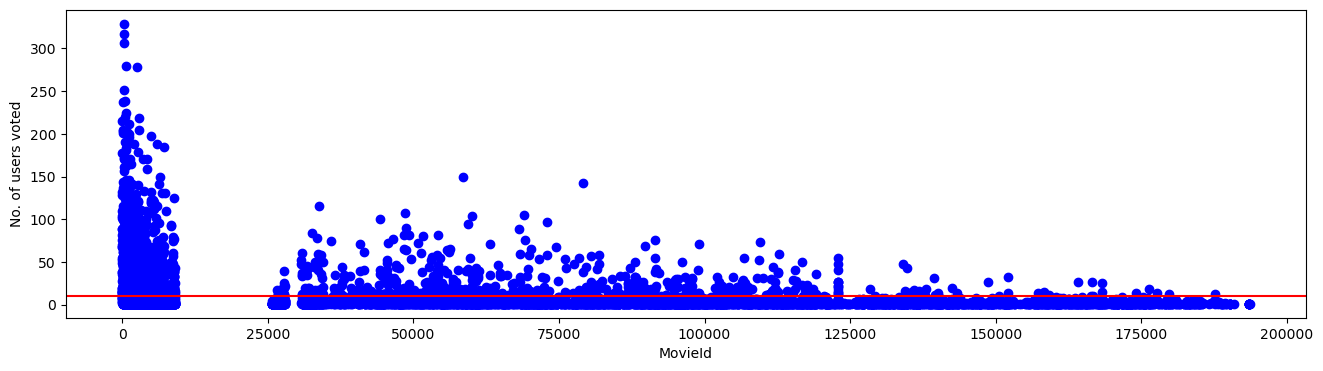

In [9]:
# Let’s visualize the number of users who voted with our threshold of 20 movies

f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='blue')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [10]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 20].index,:]

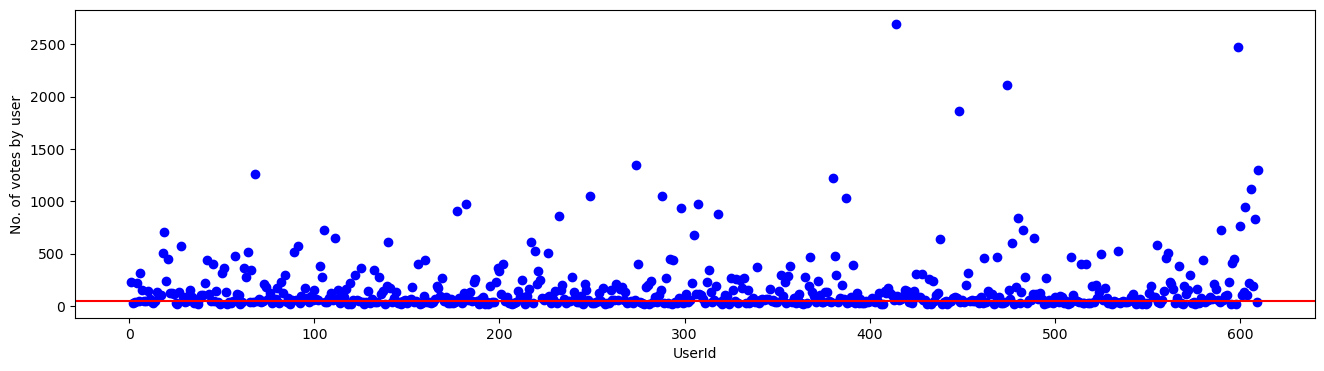

In [11]:
# Let’s visualize the number of votes by each user with our threshold of 100 movie votes

f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='blue')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [12]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 100].index]
final_dataset.head()

userId   1    4    6    7    10   15   17   18   19   20   ...  599  600  601  \
movieId                                                    ...                  
1        4.0  0.0  0.0  4.5  0.0  2.5  4.5  3.5  4.0  0.0  ...  3.0  2.5  4.0   
2        0.0  0.0  4.0  0.0  0.0  0.0  0.0  3.0  3.0  3.0  ...  2.5  4.0  0.0   
3        4.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0  ...  1.5  0.0  0.0   
5        0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  2.5  0.0   
6        4.0  0.0  4.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  ...  4.5  0.0  0.0   

userId   602  603  605  606  607  608  610  
movieId                                     
1        0.0  4.0  4.0  2.5  4.0  2.5  5.0  
2        4.0  0.0  3.5  0.0  0.0  2.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  2.0  0.0  
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6        3.0  4.0  0.0  0.0  0.0  0.0  5.0  

[5 rows x 245 columns]

In [13]:
#To reduce the sparsity we use the csr_matrix function from the scipy library

csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [14]:
#We will be using KNN algorithm to compute similarity with cosine distance metric

knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [16]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [17]:
#Here are some examples

In [18]:
get_movie_recommendation('Memento')

Title  Distance
1                              Minority Report (2002)  0.340566
2                            Kill Bill: Vol. 2 (2004)  0.337014
3                         Seven (a.k.a. Se7en) (1995)  0.331214
4       Lord of the Rings: The Two Towers, The (2002)  0.324736
5                                 Pulp Fiction (1994)  0.315937
6        Eternal Sunshine of the Spotless Mind (2004)  0.306779
7                            Kill Bill: Vol. 1 (2003)  0.300369
8   Lord of the Rings: The Fellowship of the Ring,...  0.289472
9                                  Matrix, The (1999)  0.276603
10                                  Fight Club (1999)  0.237233

In [19]:
get_movie_recommendation('Iron Man')

Title  Distance
1      Kung Fu Panda (2008)  0.334114
2      Batman Begins (2005)  0.330712
3         District 9 (2009)  0.322516
4                 Up (2009)  0.310084
5          Inception (2010)  0.308520
6      Avengers, The (2012)  0.281729
7         Iron Man 2 (2010)  0.279696
8             WALL·E (2008)  0.258217
9             Avatar (2009)  0.250460
10  Dark Knight, The (2008)  0.222467

In [20]:
get_movie_recommendation('Titanic')

Title  Distance
1                            Truman Show, The (1998)  0.402309
2                                       Shrek (2001)  0.395641
3                         Catch Me If You Can (2002)  0.393854
4                         Saving Private Ryan (1998)  0.383860
5                                 Matrix, The (1999)  0.380372
6                                Finding Nemo (2003)  0.379042
7   Star Wars: Episode I - The Phantom Menace (1999)  0.367921
8                            Sixth Sense, The (1999)  0.366169
9                                Forrest Gump (1994)  0.349649
10                  Men in Black (a.k.a. MIB) (1997)  0.341052

In [21]:
get_movie_recommendation('Avatar')

Title  Distance
1         Zombieland (2009)  0.358093
2        I Am Legend (2007)  0.345760
3      Kung Fu Panda (2008)  0.341784
4      Hangover, The (2009)  0.313034
5          Inception (2010)  0.309654
6         District 9 (2009)  0.281054
7   Dark Knight, The (2008)  0.278801
8             WALL·E (2008)  0.269719
9           Iron Man (2008)  0.250460
10                Up (2009)  0.237381

In [23]:
get_movie_recommendation('Kung Fu Panda ')

Title  Distance
1              Thor (2011)  0.451279
2       Toy Story 3 (2010)  0.441266
3     Hangover, The (2009)  0.440101
4        Zombieland (2009)  0.427862
5                Up (2009)  0.412773
6            WALL·E (2008)  0.398525
7   Sherlock Holmes (2009)  0.392885
8          Iron Man (2008)  0.373687
9     Despicable Me (2010)  0.369476
10           Avatar (2009)  0.358604